In [1]:
import pandas as pd
import numpy as np
from pyopenms import OnDiscMSExperiment
import matplotlib.pyplot as plt

In [10]:
def print_results(df):
    results_df = df[["amino_acid", "mod_name"]].groupby(["amino_acid"])
    for amino_acid, sub_df in results_df:
        print(amino_acid)
        print(pd.unique(sub_df["mod_name"]))

In [3]:
def get_mods(df):
    #return df[np.logical_and(df["mod_name"]!="unmodified", df["type"]!="NL")]
    return df[df["mod_name"]!="unmodified"]

In [19]:
def grouped_bar_mods(dfs_unmod, dfs_mod, xticklabels, xlabel, out_name=None, legend_loc="upper right"):
    x = np.arange(len(dfs_mod))
    width = 0.25

    fig, ax = plt.subplots(layout='constrained')

    ax.grid(True)

    if len(dfs_unmod) > 0:
        ax.bar_label(ax.bar(x, [len(get_mods(df)) for df in dfs_unmod], width, label="unmod"), padding=3)

    ax.bar_label(ax.bar(x + width, [len(get_mods(df)) for df in dfs_mod], width, label="mod"), padding=3)

    ax.set_ylabel('Number of detected diagnostic ions')
    ax.set_xlabel(xlabel)
    #ax.set_title(f"Number of detected diagnostic ions for different {xlabel}")
    ax.set_xticks(x + width/2, xticklabels)
    ax.legend(loc=legend_loc)
    #ax.set_ylim(0, 250)

    if out_name is not None:
        plt.savefig(f"../data/plots/{out_name}.png", bbox_inches="tight")
    plt.show()


In [5]:
def grouped_bar_mods_spectra(dfs_unmod, dfs_mod, xticklabels, xlabel, out_name=None, legend_loc="upper right"):
    x = np.arange(len(dfs_unmod))
    width = 0.25

    fig, ax = plt.subplots(layout='constrained')

    ax.bar_label(ax.bar(x, [len(get_mods(df)["spectrum_id"].unique()) for df in dfs_unmod], width, label="unmod"), padding=3)

    ax.bar_label(ax.bar(x + width, [len(get_mods(df)["spectrum_id"].unique()) for df in dfs_mod], width, label="mod"), padding=3)

    ax.set_ylabel('Number of detected ions for mods')
    ax.set_xlabel(xlabel)
    ax.set_title(f"Number of spectra with detected mod ions for different {xlabel}")
    ax.set_xticks(x + width/2, xticklabels)
    ax.legend(loc=legend_loc)
    ax.grid(True)
    #ax.set_ylim(0, 250)

    if out_name is not None:
        plt.savefig(f"../data/plots/{out_name}.png")
    plt.show()

## DFs Higher collision energy only

In [6]:
dfs_mod_snrs = [
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_1.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_2.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_5.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_10.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_20.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_50.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_100.csv"),
]

In [ ]:
dfs_mod_ppm = [
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_0.csv"),
]

In [7]:
dfs_unmod_snrs = [
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_1.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_2.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_5.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_10.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_20.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_50.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_100.csv"),
]

In [ ]:
dfs_unmod_ppm = [
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_unmod.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_0.csv"),
]

In [15]:
dfs_different_collision_energies = [
    pd.read_csv("../data/result_csvs/230228_Immonium_30NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_35NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_40NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_45NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_50NCE_mod.mzML_diagnostic_ions_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_55NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230228_Immonium_60NCE_mod.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
]

## DFs "DIA" files (mixed energy)

In [6]:
dfs_dia_mod_snr = [
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_1.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_2.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_5.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_10.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_20.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_50.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_100.csv"),
]

In [ ]:
dfs_dia_mod_10ppm_snr = [
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_1.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_2.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_5.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_10.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_20.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_50.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_100.csv"),
]

In [ ]:
dfs_dia_mod_ppm = [
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_0.csv"),
]

In [7]:
dfs_dia_unmod_snr = [
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_1.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_2.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_5.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_10.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_20.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_50.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_100.csv"),
]

In [ ]:
dfs_dia_unmod_10ppm_snr = [
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_1.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_2.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_3.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_5.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_10.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_20.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_50.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_100.csv"),
]

In [ ]:
dfs_dia_unmod_ppm = [
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_6_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_7_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_8_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_9_snr_threshold_0.csv"),
    pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_10_snr_threshold_0.csv"),
]

In [ ]:
grouped_bar_mods(dfs_dia_unmod_ppm, dfs_dia_mod_ppm, [5, 6, 7, 8, 9, 10], "ppm tolerance", legend_loc="upper left", out_name="dia_ppm tolerances")

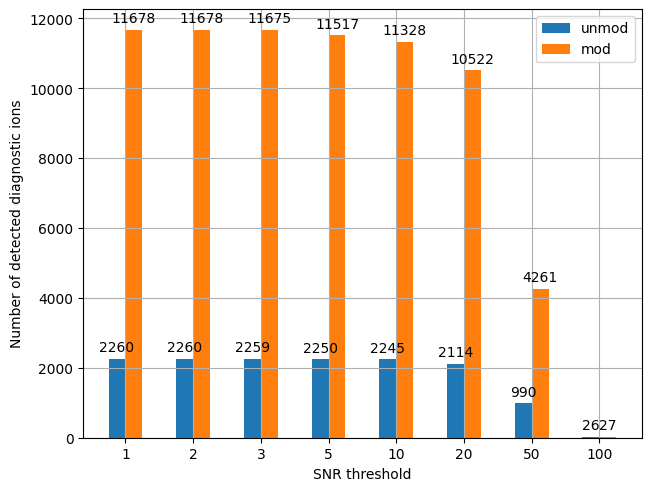

In [8]:
grouped_bar_mods(dfs_dia_unmod_snr, dfs_dia_mod_snr, [1,2,3,5,10,20,50,100], "SNR threshold", out_name="dia_snr_thresholds")

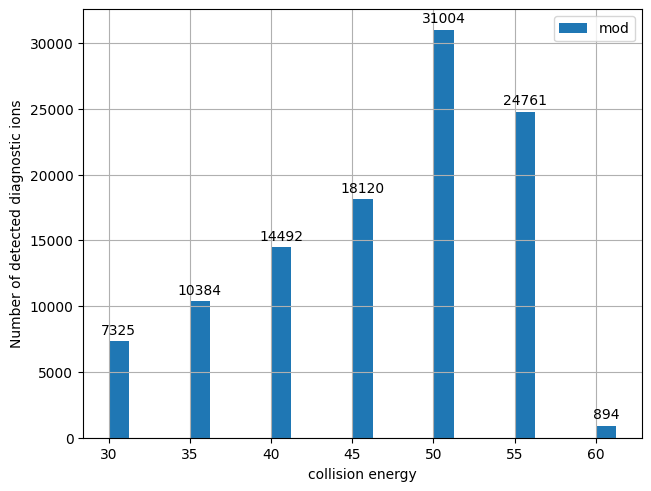

In [20]:
grouped_bar_mods([], dfs_different_collision_energies, [30, 35, 40, 45, 50, 55, 60], "collision energy", out_name="collision_energies")

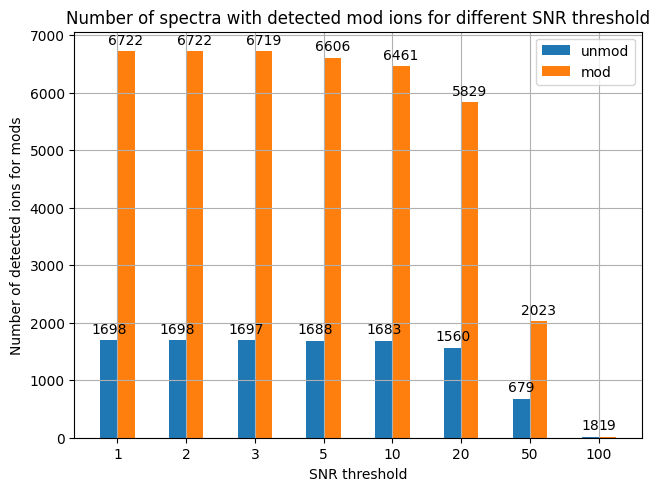

In [9]:
grouped_bar_mods_spectra(dfs_dia_unmod_snr, dfs_dia_mod_snr, [1,2,3,5,10,20,50,100], "SNR threshold", out_name="dia_snr_thresholds_spectra")

In [ ]:
grouped_bar_mods(dfs_dia_unmod_10ppm_snr, dfs_dia_mod_10ppm_snr, [1,2,3,5,10,20,50,100], "SNR threshold", out_name="dia_snr_thresholds_10ppm")

In [ ]:
df_dia_mod = pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Modified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_0.csv")
df_dia_unmod = pd.read_csv("../data/result_csvs/230928_JL_Immonium_ions_Unmodified_DIA.mzML_diagnostic_ions_ppm_tolerance_5_snr_threshold_0.csv")

In [ ]:
df_dia_unmod[df_dia_unmod == "alpha-amino-epsilon-caprolactam"] = "a.a.e.c."

In [11]:
mods_df = get_mods(dfs_dia_mod_snr[2])
unmods_df = get_mods(dfs_dia_unmod_snr[2])

In [12]:
mods_df_by_mod = mods_df[["amino_acid", "mod_name", "type", "theoretical_mz", "spectrum_id"]].groupby(["amino_acid", "mod_name", "type", "theoretical_mz"]).count().rename(columns={"spectrum_id": "count"})
mods_df_by_mod

count
amino_acid mod_name                   type       theoretical_mz       
Arginine   Deamidation                IM         130.0975           37
Cysteine   Carbamidomethyl            IM         133.0430            4
           Carbamidomethyl-N-Terminal IM         133.0430            4
Histidine  Carbamidomethyl            IM         167.0927           25
           Methyl                     IM         124.0869            4
Lysine     Acetyl                     IM         143.1179           56
                                      IM-NH3     126.0913          547
           Biotin                     IM-NH3     310.1584          424
                                      side-chain 227.0849          175
           Butyryl                    IM         154.1226            3
           Carbamidomethyl            IM         141.1022          627
           Crotonyl                   IM         152.1070            1
           Formyl                     IM         112.0757           53
           Glutarylation              IM         182.1176            1
           GlyGlycylation             IM         115.0502           14
           Hex                        IM         179.1000            1
                                                 192.1000           86
           Malonyl                    IM         126.0913          547
           Methyl                     IM-NH3     98.0964           888
                                      y1         161.1285            6
           Suc_anh_light              IM         184.0968            2
           Thiazolidine               IM         113.1073            8
           di-Methylation             IM         129.1386            3
                                      y1         175.1441            3
Proline    Hydroxylation              IM         86.0600          3174
           Phospho+Oxidation          IM         68.0495           194
Tryptophan Hydroxylation              IM         175.0857          136
           Methyl                     IM-29      144.0808            7
           Thiazolidine               IM         171.0917            6
           kynurenin                  IM         163.0857            9
Tyrosine   Nitro                      IM         181.0608          612
           Phospho                    IM         216.0420         4018

In [ ]:
fig, ax = plt.subplots(figsize=(6, 16))

y_pos = np.arange(len(mods_df_by_mod))
ax.barh(y_pos, mods_df_by_mod["count"], align='center')
#ax.set_yticks(y_pos, [(",").join([str(index_field) for index_field in mod.Index[:2]]) for mod in mods_df_by_mod.itertuples()])
ax.set_yticks([])
ax.set_xticks(np.arange(0, 35000, 10000))
plt.xticks(fontsize=17)
ax.invert_yaxis() 
ax.set_xlim(0, 35000)
ax.margins(y=0)
ax.grid(True)
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

table = ax.table(cellText=[[str(index_field) for index_field in mod.Index] + [mod.count] for mod in mods_df_by_mod.itertuples()], loc="left", colWidths=[0.07, 0.18, 0.08, 0.06, 0.04],)
# based on https://stackoverflow.com/a/55661458
cell_height = 1 / len(mods_df_by_mod)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_height)
    cell.set_edgecolor("gray")
table.scale(5, 1)
table.set_fontsize(20)

fig.savefig("../data/plots/DIA_mods_10ppm_grouped_table.png", bbox_inches="tight")

plt.show()

In [13]:
unmods_df_by_mod = unmods_df[["amino_acid", "mod_name", "type", "theoretical_mz", "spectrum_id"]].groupby(["amino_acid", "mod_name", "type", "theoretical_mz"]).count().rename(columns={"spectrum_id": "count"})#.to_csv("tables/snr_2_ppm_5_unmods_aggregated.csv")
unmods_df_by_mod

count
amino_acid mod_name                   type                            theoretical_mz       
Arginine   Deamidation                IM                              130.0975           26
Cysteine   Carbamidomethyl            IM                              133.0430            5
           Carbamidomethyl-N-Terminal IM                              133.0430            5
Histidine  Carbamidomethyl            IM                              167.0927           22
           HNE                        IM                              266.1863            2
           Methyl                     IM                              124.0869            1
Lysine     Acetyl                     IM                              143.1179          247
                                      IM-NH3                          126.0913           63
           Butyryl                    IM                              154.1226            1
           Carbamidomethyl            IM                              141.1022          991
           Crotonyl                   IM                              152.1070            1
           Diethylation               IM-NH(CH3)2                     112.1121            2
           Formyl                     IM                              112.0757          122
           Glutarylation              IM                              182.1176            1
           GlyGlycylation             IM                              115.0502           34
           Hex                        IM                              191.1000            1
                                                                      192.1000          136
           Hexylation                 alpha-amino-epsilon-caprolactam 213.1961            1
           Malonyl                    IM                              126.0913           63
           Methyl                     IM-NH3                          98.0964           146
           Suc_anh_light              IM                              184.0968            2
           Thiazolidine               IM                              113.1073           10
Proline    Hydroxylation              IM                              86.0600           125
Tryptophan Hydroxylation              IM                              175.0857           97
           Methyl                     IM-29                           144.0808            3
           Thiazolidine               IM                              171.0917            4
           kynurenin                  IM                              163.0857           10
Tyrosine   Nitro                      IM                              181.0608          137
           Phospho                    IM                              216.0420            1

In [ ]:
unmods_df[unmods_df == "alpha-amino-epsilon-caprolactam"] = "a.a.e.c"

In [ ]:
fig, ax = plt.subplots(figsize=(6, 16*len(unmods_df_by_mod)/len(mods_df_by_mod)))

y_pos = np.arange(len(unmods_df_by_mod))
ax.barh(y_pos, unmods_df_by_mod["count"], align='center')
#ax.set_yticks(y_pos, [(",").join([str(index_field) for index_field in mod.Index[:2]]) for mod in mods_df_by_mod.itertuples()])
ax.set_yticks([])
ax.set_xticks(np.arange(0, 35000, 10000))
plt.xticks(fontsize=17)
ax.invert_yaxis() 
ax.set_xlim(0, 35000)
ax.grid(True)
ax.margins(y=0)
ax.invert_xaxis() 
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

table = ax.table(cellText=[[mod.count] + [str(index_field) for index_field in mod.Index] for mod in unmods_df_by_mod.itertuples()],
                 loc="right", colWidths=[0.04, 0.07, 0.18, 0.08, 0.06])
# based on https://stackoverflow.com/a/55661458
cell_height = 1 / len(unmods_df_by_mod)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_height)
    cell.set_edgecolor("gray")
table.scale(5, 1)
table.set_fontsize(20)

fig.savefig("../data/plots/DIA_unmods_10ppm_grouped_table.png", bbox_inches="tight")

plt.show()

In [ ]:
grouped_bar_mods(dfs_unmod_snrs[1:], dfs_mod_snrs[1:], [1,2,3,5,10,20,50,100], "SNR threshold", out_name="snr_thresholds")

In [ ]:
grouped_bar_mods(dfs_unmod_ppm, dfs_mod_ppm, [5, 6, 7, 8, 9, 10], "ppm tolerance", legend_loc="upper left", out_name="ppm tolerances")

In [ ]:
grouped_bar_mods_spectra(dfs_unmod_ppm, dfs_mod_ppm, [5, 6, 7, 8, 9, 10], "ppm tolerances", legend_loc="upper left")